In [ ]:
! pip install transformers
! pip install torch

In [2]:
import torch 
import re 
from transformers import AutoTokenizer, ViTFeatureExtractor, VisionEncoderDecoderModel 
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
device='cpu'
encoder_checkpoint = "./pretrained"
decoder_checkpoint = "./pretrained"
model_checkpoint = "./pretrained"
feature_extractor = ViTFeatureExtractor.from_pretrained(encoder_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(decoder_checkpoint)
model = VisionEncoderDecoderModel.from_pretrained(model_checkpoint).to(device)

# Save Model Pre Trained
# "nlpconnect/vit-gpt2-image-captioning"
# feature_extractor.save_pretrained('./pretrained/')
# tokenizer.save_pretrained('./pretrained/')
# model.save_pretrained('./pretrained/')

In [4]:
def predict(image, max_length=64, num_beams=4):
    image = image.convert('RGB')
    image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)
    clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
    caption_ids = model.generate(image, max_length = max_length)[0]
    caption_text = clean_text(tokenizer.decode(caption_ids))
    return caption_text 

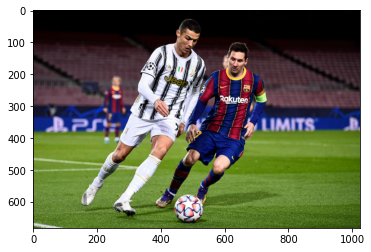

'two soccer players are playing soccer on a field '

In [6]:
img_path = ".imgs/example1.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

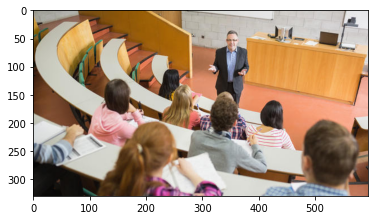

'a man in a suit is speaking to a group of people '

In [7]:
img_path = ".imgs/example2.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

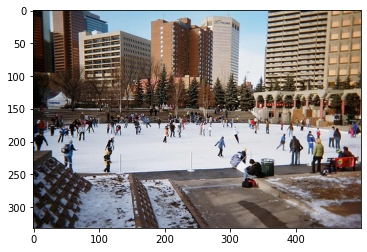

'a large group of people are snowboarding in a park '

In [8]:
img_path = ".imgs/example3.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

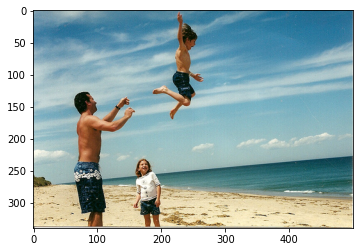

'a man and a boy jumping up into the air on a beach '

In [9]:
img_path = ".imgs/example4.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

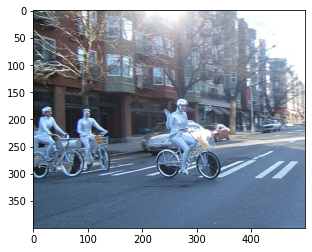

'a parade of people riding bicycles down a street '

In [10]:
img_path = ".imgs/example5.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption

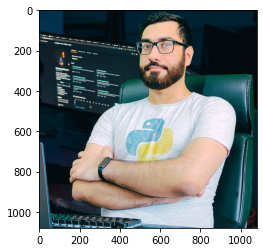

'a man with glasses sitting in front of a computer '

In [11]:
img_path = ".imgs/example6.jpg"
image = Image.open(img_path)
caption = predict(image)
plt.imshow(image)
plt.show()
caption